
P-Value Correction Results:
  Test  Original p-value  Bonferroni-corrected p-value  FDR-corrected p-value  Significant (FDR < 0.05)
Test 1          0.373483                      1.000000               0.497977                     False
Test 2          0.002520                      0.020159               0.005625                      True
Test 3          0.002813                      0.022500               0.005625                      True
Test 4          0.873148                      1.000000               0.873148                     False
Test 5          0.002557                      0.020456               0.005625                      True
Test 6          0.752260                      1.000000               0.859726                     False
Test 7          0.005541                      0.044331               0.008866                      True
Test 8          0.000002                      0.000013               0.000013                      True


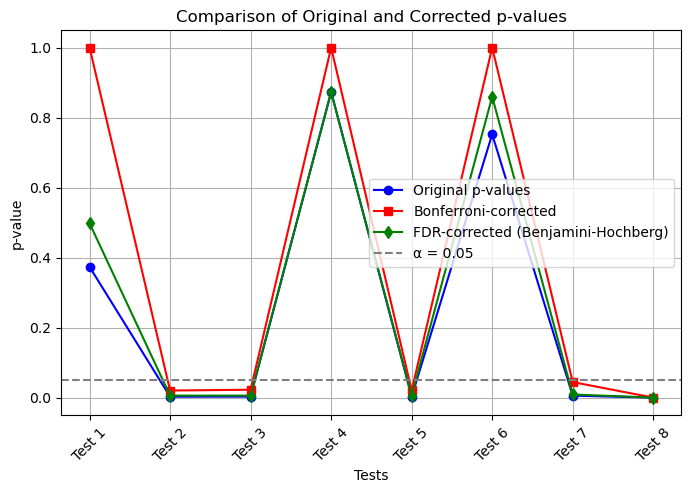

In [13]:
# Import necessary libraries
import numpy as np
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt
import pandas as pd

# Example p-values from 8 tests (Replace with actual p-values if available)
p_values = np.array([0.37348251943716404, 0.002519867920644181, 0.0028125332425554816, 0.8731479122657528, 0.0025570532536181023, 0.75226017098037, 0.005541363963657675, 1.6511459191015376e-06])  

# Apply Bonferroni correction
bonferroni_corrected = np.minimum(p_values * len(p_values), 1.0)  # Ensuring values don't exceed 1

# Apply FDR correction using Benjamini-Hochberg method
rejected, fdr_corrected = smm.fdrcorrection(p_values, alpha=0.05, method='indep')

# Create a DataFrame for the results
results_df = pd.DataFrame({
    "Test": [f"Test {i+1}" for i in range(len(p_values))],
    "Original p-value": p_values,
    "Bonferroni-corrected p-value": bonferroni_corrected,
    "FDR-corrected p-value": fdr_corrected,
    "Significant (FDR < 0.05)": rejected
})

# Print table
print("\nP-Value Correction Results:")
print(results_df.to_string(index=False))

# Plot results
plt.figure(figsize=(8, 5))
x_labels = [f"Test {i+1}" for i in range(len(p_values))]

plt.plot(x_labels, p_values, 'o-', label="Original p-values", color='blue')
plt.plot(x_labels, bonferroni_corrected, 's-', label="Bonferroni-corrected", color='red')
plt.plot(x_labels, fdr_corrected, 'd-', label="FDR-corrected (Benjamini-Hochberg)", color='green')

# Add threshold line for α = 0.05
plt.axhline(y=0.05, color='gray', linestyle='--', label="α = 0.05")

plt.ylabel("p-value")
plt.xlabel("Tests")
plt.title("Comparison of Original and Corrected p-values")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()
